In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastai.text import *

In [2]:
path = Path('/home/paperspace/suicides')
#! head -100 /home/paperspace/suicides/data/raw_disch_full.csv

In [3]:
with open(path/'data/raw_disch_full.csv', "r") as f:
    lines = f.read()
lines = lines.split('ryan\n')

In [24]:
rows = []
weirds = []
for line in lines:
    row = line.split('||')
    if len(row) == 4:
        rows.append(row)
    else:
        weirds.append(line)
len(weirds)

3

In [52]:
text_df = pd.DataFrame(columns=rows[0], data=rows[1:])
text_df = text_df.drop('CHARTTIME',axis=1) # they're all missing
text_df[['SUBJECT_ID','HADM_ID']] = text_df[['SUBJECT_ID','HADM_ID']].astype(int)
text_df.head()

,SUBJECT_ID,HADM_ID,TEXT
0,22532,167853,Admission Date: [**2151-7-16**] Dischar...
1,13702,107527,Admission Date: [**2118-6-2**] Discharg...
2,13702,167118,Admission Date: [**2119-5-4**] D...
3,13702,196489,Admission Date: [**2124-7-21**] ...
4,26880,135453,Admission Date: [**2162-3-3**] D...


(10, 1336.2165297569154, 7980)

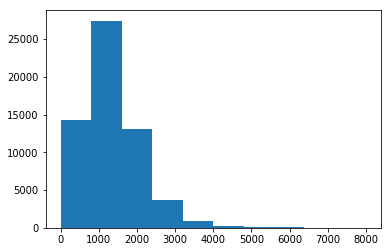

In [43]:
word_count = np.sort(text_df.TEXT.apply(lambda x: len(x.split(' '))))
max_word_count = np.max(word_count)
mean_word_count = np.mean(word_count)
min_word_count = np.min(word_count)
plt.hist(word_count)
min_word_count, mean_word_count, max_word_count

In [48]:
labels_df = pd.read_csv(path/'data/suicide_class.csv')
labels_df['labels'] = 1
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 2 columns):
SUBJECT_ID    608 non-null int64
labels        608 non-null int64
dtypes: int64(2)
memory usage: 9.6 KB


In [55]:
# NB: left join drops 28 suicide labels with no notes!
df = pd.merge(text_df,labels_df,on='SUBJECT_ID',how='left')
df = df[['labels','TEXT','SUBJECT_ID','HADM_ID']]
df.columns = [col.lower() for col in df.columns]

df = df.fillna(0)
df[['labels','subject_id','hadm_id']] = df[['labels','subject_id','hadm_id']].astype(int)
df.to_csv(path/'data/std_format_raw_data.csv')

df.head()

,labels,text,subject_id,hadm_id
0,0,Admission Date: [**2151-7-16**] Dischar...,22532,167853
1,0,Admission Date: [**2118-6-2**] Discharg...,13702,107527
2,0,Admission Date: [**2119-5-4**] D...,13702,167118
3,0,Admission Date: [**2124-7-21**] ...,13702,196489
4,0,Admission Date: [**2162-3-3**] D...,26880,135453


In [62]:
# percent of data with label=1 (suicides)
df.labels.sum()/len(df.labels)*100

1.5356244761106455